In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
file='C:/Users/patel/Downloads/weather.csv'

In [3]:
df=pd.read_csv(file, encoding ='ascii')

In [4]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df[['precipitation','wind','temp_max','temp_min']]
y=df['weather']

In [7]:
#performing test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [8]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (949, 4)
X_test dimension=  (512, 4)
y_train dimension=  (949,)
y_train dimension=  (512,)


In [9]:
from sklearn.tree import DecisionTreeClassifier


In [39]:
#Initializing model using Decision Tree
model=DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [40]:
#fitting the data in the model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
#predicting on test data
y_pred = model.predict(X_test)

In [42]:
print(y_pred)

['sun' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun'
 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun'
 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun'
 'snow' 'sun' 'rain' 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun'
 'sun' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun'
 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'rain' 'drizzle' 'sun'
 'sun' 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun'
 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun'
 'rain' 'sun' 'rain' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'rain'
 'sun' 'rain' 'sun' 'sun' 'rain' 'snow' 'rain' 'sun' 'sun' 'rain' 'sun'
 'rain' 'rain' 'sun' 'rain' 'rain' 'sun' 'drizzle' 'sun' 'sun' 'sun'
 'rain' 'rain' 'rain' 'rain' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun'
 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun'
 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun'
 

In [43]:
np.unique(y_pred, return_counts=True)


(array(['drizzle', 'rain', 'snow', 'sun'], dtype=object),
 array([  3, 208,  11, 290], dtype=int64))

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
#Checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')


Accuracy: 0.841796875


[Text(0.5265151515151515, 0.9166666666666666, 'X[0] <= 0.15\nentropy = 1.596\nsamples = 949\nvalue = [38, 64, 416, 17, 414]'),
 Text(0.2803030303030303, 0.75, 'X[2] <= 4.7\nentropy = 1.157\nsamples = 545\nvalue = [38, 64, 29, 0, 414]'),
 Text(0.12121212121212122, 0.5833333333333334, 'X[3] <= -1.9\nentropy = 0.934\nsamples = 20\nvalue = [7, 0, 0, 0, 13]'),
 Text(0.06060606060606061, 0.4166666666666667, 'X[3] <= -3.0\nentropy = 0.391\nsamples = 13\nvalue = [1, 0, 0, 0, 12]'),
 Text(0.030303030303030304, 0.25, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 9]'),
 Text(0.09090909090909091, 0.25, 'X[2] <= 3.05\nentropy = 0.811\nsamples = 4\nvalue = [1, 0, 0, 0, 3]'),
 Text(0.06060606060606061, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(0.12121212121212122, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]'),
 Text(0.18181818181818182, 0.4166666666666667, 'X[1] <= 2.3\nentropy = 0.592\nsamples = 7\nvalue = [6, 0, 0, 0, 1]'),


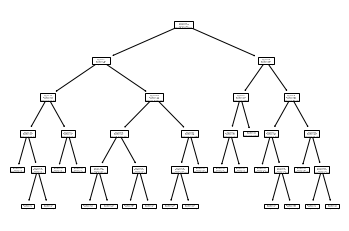

In [47]:
#plotting the decision tree
from sklearn import tree
tree.plot_tree(model)

In [18]:
#plotting the confusion matrix using seaborn and sklearn 
from sklearn.metrics import confusion_matrix

In [19]:
cm=confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[  1,   3,   0,   0,  11],
       [  2,   8,   4,   0,  23],
       [  0,   3, 203,   8,  11],
       [  0,   0,   6,   3,   0],
       [ 19,  32,   9,   0, 166]], dtype=int64)

In [21]:
labels=['drizzle','fog','rain','snow','sun']

<AxesSubplot:>

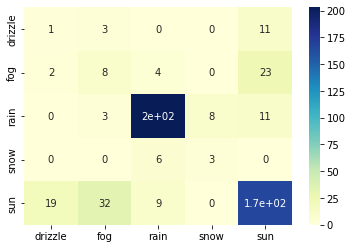

In [24]:
sb.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels,cmap='YlGnBu')